In [1]:
# Rongmon, this is an example notebook to show you how to access the MagE spectra.  
# It reads in the stacked spectra and the individual MagE spectra.
# Most things get written into a Pandas DataFrame.
# I then show you how to address individual spectra, and plot SiII, SiIV.  
import jrr
import numpy as np
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
mage_mode = "released"

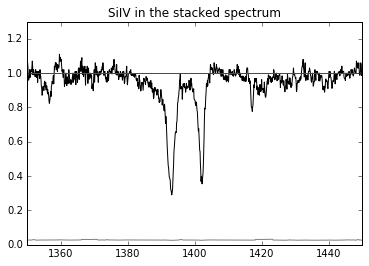

In [3]:
# Load the stacked spectra
# Stack A has been normalized by median continuum ~1270A.
(stackA, LL) = jrr.mage.open_stacked_spectrum(mage_mode, which_stack="Stack-A", addS99=True)
# std stack has been normalized by hand-fit continuum.  Has flat spectral slope
(stack_std, LL) = jrr.mage.open_stacked_spectrum(mage_mode, which_stack="standard", addS99=True)
plt.plot(stack_std['rest_wave'], stack_std['rest_fnu'], color='black')
plt.plot(stack_std['rest_wave'], stack_std['rest_fnu_u'], color='grey')
plt.plot((1300,1500), (1,1), color='green') # continuum should be unity
plt.xlim(1350,1450)
plt.ylim(0,1.3)
plt.title("SiIV in the stacked spectrum")

In [12]:
# Load all the MagE spectra.  This is slow. When the asterisk goes away it's done
(sp, resoln, dresoln, LL, zz_sys, speclist) = jrr.mage.open_many_spectra(mage_mode, verbose=False)

Loading MagE spectra in advance; this may be slow, but worthwhile if doing a lot of back and forth.


In [14]:
# speclist is a dataframe that describes the spectra. Its index is "short_label", 
# which are the unique names of the spectra.
example = "rcs0327-U"
print "Stellar redshift for Cosmic Eye: ", speclist.ix[example]['z_stars']
speclist.tail(2)

Stellar redshift for Cosmic Eye:  1.7038


,origdir,filename,short_label,z_stars,sig_st,fl_st,z_neb,sig_neb,fl_neb,z_ISM,sig_ISM,fl_ISM,NOTES,z_syst,dz_syst
short_label,,,,,,,,,,,,,,,
S2111-0114,S2111m0114/,s2111-combwC1.txt,S2111-0114,2.859877,0.00165,False,2.8577,-999.00000,True,2.858300,0.0007,False,foo,2.85988,0.00165
Cosmic~Eye,Cosmic_eye/,cosmiceye-combwC1.txt,Cosmic~Eye,3.074834,0.00040,False,3.0735,0.00024,False,3.072358,0.0003,False,zneb_zism_from_Quider+10;_ISM_has_multiple_zs,3.07483,0.0004


In [15]:
# The spectra are stored in in a dictionary of dataframes, called sp
thisgal = example
print "Let's pick an example galaxy:", thisgal
print sp[thisgal].keys()  # All the column names in the spectrum
sp[thisgal].head(2)
# The main colums you would care about are wave, fnu, rest_wave, rest_fnu.  More in email.

Let's pick an example galaxy: rcs0327-U
Index([u'wave', u'fnu', u'fnu_u', u'wave_sky', u'fnu_sky', u'fnu_cont',
       u'fnu_cont_u', u'disp', u'flam', u'flam_u', u'flam_sky', u'flam_cont',
       u'flam_cont_u', u'badmask', u'linemask', u'fnu_autocont', u'rest_wave',
       u'rest_fnu', u'rest_fnu_u', u'rest_flam', u'rest_flam_u', u'rest_disp',
       u'rest_fnu_cont', u'rest_fnu_cont_u', u'rest_flam_cont',
       u'rest_flam_cont_u', u'rest_fnu_autocont', u'flam_autocont',
       u'rest_flam_autocont', u'fnu_s99model', u'fnu_s99data',
       u'rest_fnu_s99model', u'rest_fnu_s99data'],
      dtype='object')


,wave,fnu,fnu_u,wave_sky,fnu_sky,fnu_cont,fnu_cont_u,disp,flam,flam_u,...,rest_fnu_cont_u,rest_flam_cont,rest_flam_cont_u,rest_fnu_autocont,flam_autocont,rest_flam_autocont,fnu_s99model,fnu_s99data,rest_fnu_s99model,rest_fnu_s99data
0,3200.1722,2.155000e-29,3.051000e-29,3199.521,1.691000e-28,1.970000e-29,2.876000e-30,0.2417,6.308431e-18,8.931333e-18,...,1.063688e-30,1.559247e-17,2.276342e-18,8.006359e-30,6.337000e-18,1.713398e-17,1.801799e-29,1.563371e-29,6.663952e-30,5.782126e-30
1,3200.4139,2.961000e-29,3.009000e-29,3199.762,2.165000e-28,1.969000e-29,2.877000e-30,0.2417,8.666563e-18,8.807054e-18,...,1.064058e-30,1.558220e-17,2.276790e-18,8.005883e-30,6.335666e-18,1.713037e-17,1.802070e-29,2.571927e-29,6.664952e-30,9.512267e-30


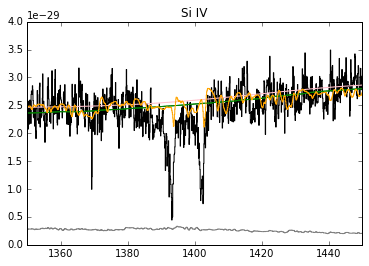

In [11]:
plt.step(sp[thisgal]['rest_wave'], sp[thisgal]['rest_fnu'], color='black')
plt.step(sp[thisgal]['rest_wave'], sp[thisgal]['rest_fnu_u'], color='grey')
plt.step(sp[thisgal]['rest_wave'], sp[thisgal]['rest_fnu_autocont'], color='green')
plt.step(sp[thisgal]['rest_wave'], sp[thisgal]['rest_fnu_autocont'], color='green')
plt.step(sp[thisgal]['rest_wave'], sp[thisgal]['rest_fnu_cont'], color='pink')
plt.step(sp[thisgal]['rest_wave'], sp[thisgal]['rest_fnu_s99model'], color='orange')
# rest_fnu_autocont is the automatically-generated continuum
plt.ylim(0,4E-29)
plt.xlim(1350,1450)
plt.title("Si IV")

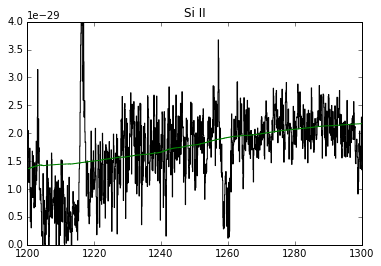

In [22]:
plt.step(sp[thisgal]['rest_wave'], sp[thisgal]['rest_fnu'], color='black')
plt.step(sp[thisgal]['rest_wave'], sp[thisgal]['rest_fnu_autocont'], color='green')
plt.ylim(0,4E-29)
plt.xlim(1200,1300)
plt.title("Si II")

In [5]:
#How to loop through spectra:
for galaxy in speclist.index[0:3] :
    print "Working on galaxy", galaxy, "at z_stars=", speclist.ix[galaxy]['z_stars'], 
    print sp[galaxy]['rest_fnu'].median()  # Do some math.  Here's where to measure stuff!

Working on galaxy rcs0327-B at z_stars= -999.0 1.06524633822e-29
Working on galaxy rcs0327-E at z_stars= 1.703741 1.73870204284e-29
Working on galaxy rcs0327-G at z_stars= 1.702957 1.8709139657e-29


In [ ]:
# I hope that was a useful reference start.  Let's take from here in person.  